C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23296\1595572629.py:13: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(output_shapefile)


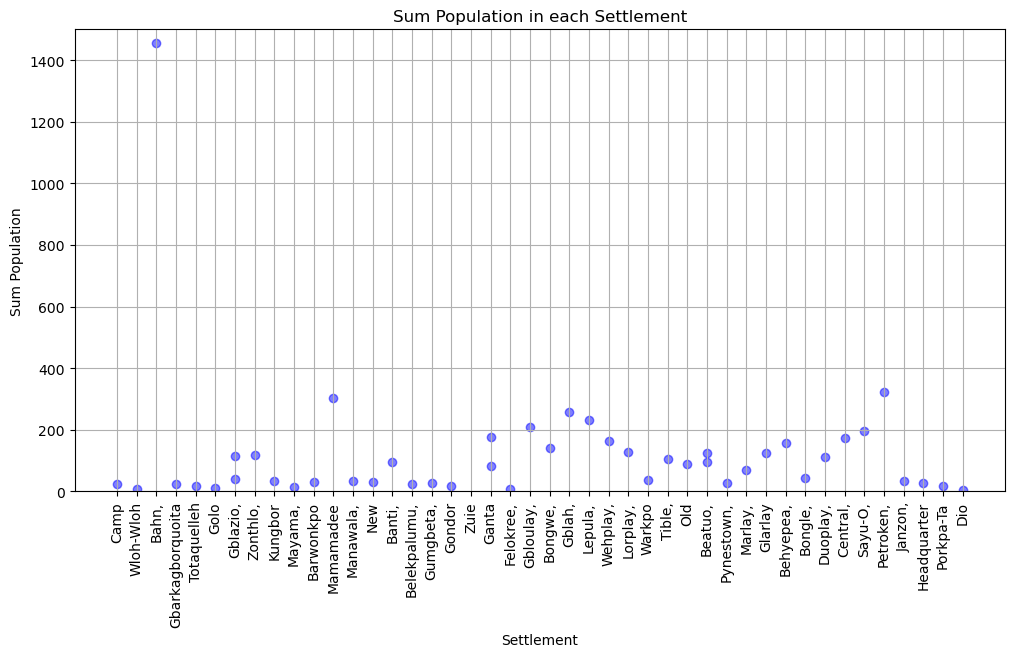

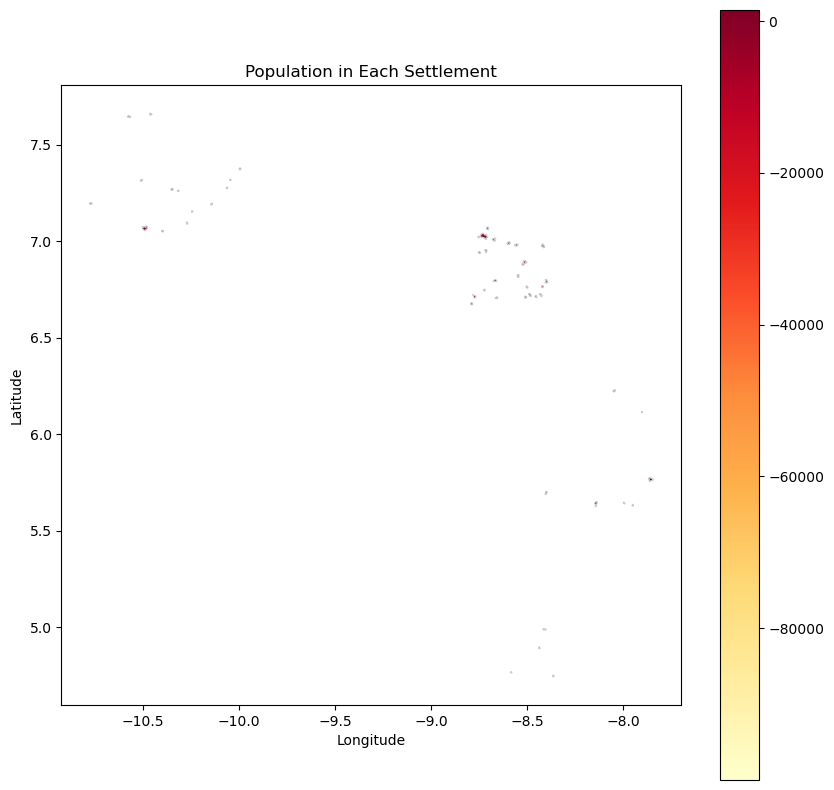

In [22]:
import geopandas as gpd
from rasterstats import zonal_stats
import matplotlib.pyplot as plt
shapefile_path = "C:/Users/Lenovo/Downloads/FANCY DOCS/VIDA INTERVIEW/shapefiles/Geocoded_Locations.shp"
rasterfile_path = "C:/Users/Lenovo/Downloads/FANCY DOCS/VIDA INTERVIEW/population data/lbr_ppp_2020.tif"
# Load shapefile using geopandas
gdf = gpd.read_file(shapefile_path)
stats = zonal_stats(gdf.geometry, rasterfile_path, stats="sum", nodata=-999)
sum_values = [feature["sum"] for feature in stats]
# Adding the sum values as a new column in the GeoDataFrame
gdf['sum_population'] = sum_values
gdf['area'] = gdf.geometry.area 
gdf['population_density'] = gdf['sum_population'] / (gdf['area'] / 1e6)  # Convert area to square kilometers
output_shapefile = "C:/Users/Lenovo/Downloads/FANCY DOCS/VIDA INTERVIEW/shapefiles/Geocoded_Locations_output.shp"
gdf.to_file(output_shapefile)
# Plotting 
plt.figure(figsize=(12, 6))
plt.ylim(0, 1500)
plt.scatter(gdf['Settlement'], gdf['sum_population'], color='blue', alpha=0.5)
plt.title('Sum Population in each Settlement')
plt.xlabel('Settlement')
plt.ylabel('Sum Population')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()
#  map 
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(column='sum_population', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Population in Each Settlement')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()